In [1]:
#Importing necessary libraries for analysing structured data:-
import pandas as pd
import numpy as np

In [8]:
#Importing dataset from .csv file into python server and also naming the dataset as 'hpd' or house price data:-
hpd=pd.read_csv("C:\\Mohit\\COURSES\\AMITY\\Summer NTCC\\Bengaluru House Data.csv")

In [10]:
#understanding the dataset in order to move ahead:-
hpd.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [12]:
hpd.dtypes

 area_type       object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [14]:
hpd.ndim

2

In [16]:
hpd.shape

(13320, 9)

In [18]:
hpd.columns

Index([' area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [20]:
hpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0    area_type    13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [22]:
# MOVING AHEAD WITH THE PROCESS OF DATA CLEANING:- 
#1.) droping the unnecessary columns which have no impact on house prices:-
hpd2=hpd.drop(['society','balcony','availability'],axis='columns')
hpd2.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [24]:
#2.) DETECTION OF NULL VALUES:-
hpd2.isna().sum()

 area_type     0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [26]:
#TREATMENT OF NULL VALUES:-
hpd3=hpd2.dropna()
hpd3.isnull().sum()
# WE PREFER TO DROP THE NULL VALUES AS THEIR RATIO IS NEGLIGIBLE AND SECOND OUR DATA DOES NOT BELONG TO ANY CRITICAL DOMAIN LIKE HEALTHCARE OR FINANCE.

 area_type    0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [28]:
hpd3.shape

(13246, 6)

In [30]:
# AFTER TREATING NULL VALUES WE BEGIN WITH THE FEATURE ENGINEERING TO IMPROOVE OUR MACHINE LEARNING MODEL:-
# 1.) WE WILL WORK WITH THE 'size' column as it has various uncleaned entries of data or non uniform entries of data.
hpd3['size'].unique() # here 4BHK is same as 4 bedroom.....

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [32]:
hpd3['bhk']=hpd3['size'].str.extract(r'(\d+)').astype(int) # creating calculated field to extarct numerical value from the entries of size column.

C:\Users\mohit\AppData\Local\Temp\ipykernel_4488\2954095100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpd3['bhk']=hpd3['size'].str.extract(r'(\d+)').astype(int) # creating calculated field to extarct numerical value from the entries of size column.


In [34]:
hpd3.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [36]:
hpd3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [38]:
hpd3[hpd3.bhk>20]

,area_type,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [40]:
hpd3['total_sqft'].unique() # here some values are given in range so now we treat those:-

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [42]:
# to treat these values which are in range we first define a function which can find if the mean of values given in range is a 'float' or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [44]:
hpd3[~hpd3['total_sqft'].apply(is_float)].head(10) 

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [46]:
#above data shows that there are values in range like '3067-8156' for index '122' and which can be replaced by the mean of max. and min. value of range .
# and then we have some values with the unit given in square meter and not in feet and some values are given in perch too so to make things simple we are 
# going to ignore these values.

In [48]:
def convert_unit_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [50]:
# testing our defined function 'convert_unit_to_num' :- 
convert_unit_to_num('5678') # falls in the category of float(x)

5678.0

In [52]:
convert_unit_to_num('1145 - 1340') # falls in the category of token and took the average

1242.5

In [54]:
convert_unit_to_num('34.46Sq. Meter') #cases like these fall in none category as defined in the function.

In [56]:
# as our function works as per our need so now time to apply it on the entire column :- 
hpd4=hpd3.copy()
hpd4['total_sqft']=hpd4['total_sqft'].apply(convert_unit_to_num)
hpd4.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [58]:
hpd4.loc[165] # to check at particular index 

 area_type    Super built-up  Area
location                  Sarjapur
size                         2 BHK
total_sqft                  1242.5
bath                           2.0
price                        43.49
bhk                              2
Name: 165, dtype: object

In [60]:
hpd5=hpd4.copy()
hpd5['per_sqft_price']=hpd5['price']*100000/hpd5['total_sqft']
hpd5.head()
# in real state market price per sqaure feet plays a major role that why we add a calculated field for same...

,area_type,location,size,total_sqft,bath,price,bhk,per_sqft_price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [62]:
len(hpd5.location.unique()) #total number of locations is way more and this problem is called as dimensionality curse in python and to overcome from this we have to work on dimensionality reduction...

1304

In [64]:
#dimesionality reduction:-
hpd5.location = hpd5.location.apply(lambda x: x.strip())
location_stats = hpd5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [66]:
len(location_stats[location_stats<=10])

1052

In [68]:
location_stats_less_than_ten = location_stats[location_stats<=10]
location_stats_less_than_ten

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [70]:
hpd5.location = hpd5.location.apply(lambda x: 'other' if x in location_stats_less_than_ten else x)
len(hpd5.location.unique()) # with this we put locations with location stats of <=10 in a 'other' category to reduce the dimesionality problem. or we took a threshold of 10

242

In [72]:
hpd5.head(10)

,area_type,location,size,total_sqft,bath,price,bhk,per_sqft_price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [74]:
# now as our feature engineering is done and thus we now move ahead with outliers and their treatment:-
hpd5[hpd5.total_sqft/hpd5.bhk<300].head() # here we assume 300 sq.ft. as threshhold by assuming that if a house with 1020sq.ft. size has 6 bedroom that its nearly imposible and we consider it an outlier as 1020/6 = 170sq.ft. each bedroom and then there are other utilities which is quite suspicious so we consider i an outlier. 

,area_type,location,size,total_sqft,bath,price,bhk,per_sqft_price
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [76]:
hpd5.shape

(13246, 8)

In [78]:
#creating new dataset for data excluding outliers :-
hpd6 = hpd5[~(hpd5.total_sqft/hpd5.bhk<300)] # usinf negation for adding non outliers in hpd6
hpd6.shape

(12502, 8)

In [80]:
#now removing outliers from the column of price per square feet :-
hpd6.per_sqft_price.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: per_sqft_price, dtype: float64

In [82]:
# min. price are quite unlikely in a city like banglore and max. might be possible but as we are making a generic model so we will move ahead with both
def treat_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.per_sqft_price)
        st = np.std(subdf.per_sqft_price)
        reduced_df = subdf[(subdf.per_sqft_price>(m-st)) & (subdf.per_sqft_price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
hpd7 = treat_pps_outliers(hpd6)
hpd7.shape

(10241, 8)

In [83]:
# now we would check if the property prices for 3bhk is less than for 2bhk for almost same sq ft area anf for same location by usig the scatter plot:-
# to plot two variable we will be needing matplotlib library:-
import matplotlib
import matplotlib.pyplot as plt

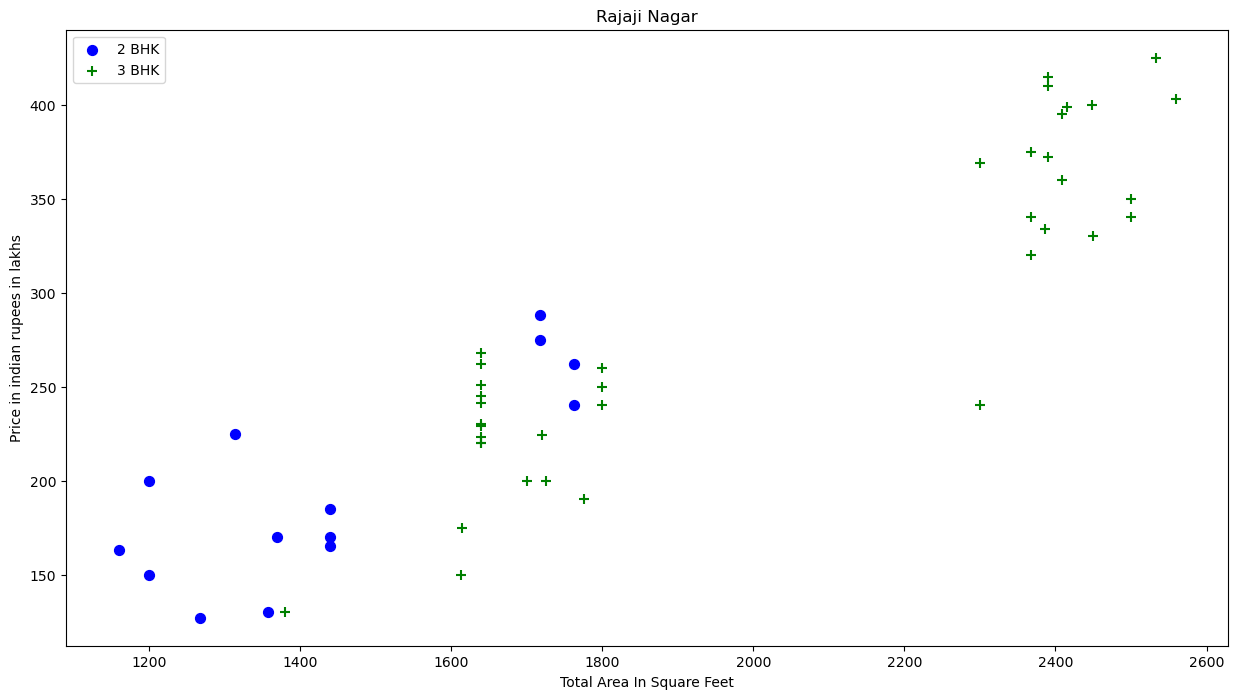

In [84]:
def scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,8)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Area In Square Feet")
    plt.ylabel("Price in indian rupees in lakhs")
    plt.title(location)
    plt.legend()
    
scatter_chart(hpd7,"Rajaji Nagar")
#after looking at the scatter plot we can know that thre are locations on which we have price prices lower for higher bhk house and that too for the same area which is not possible on any part of the land.

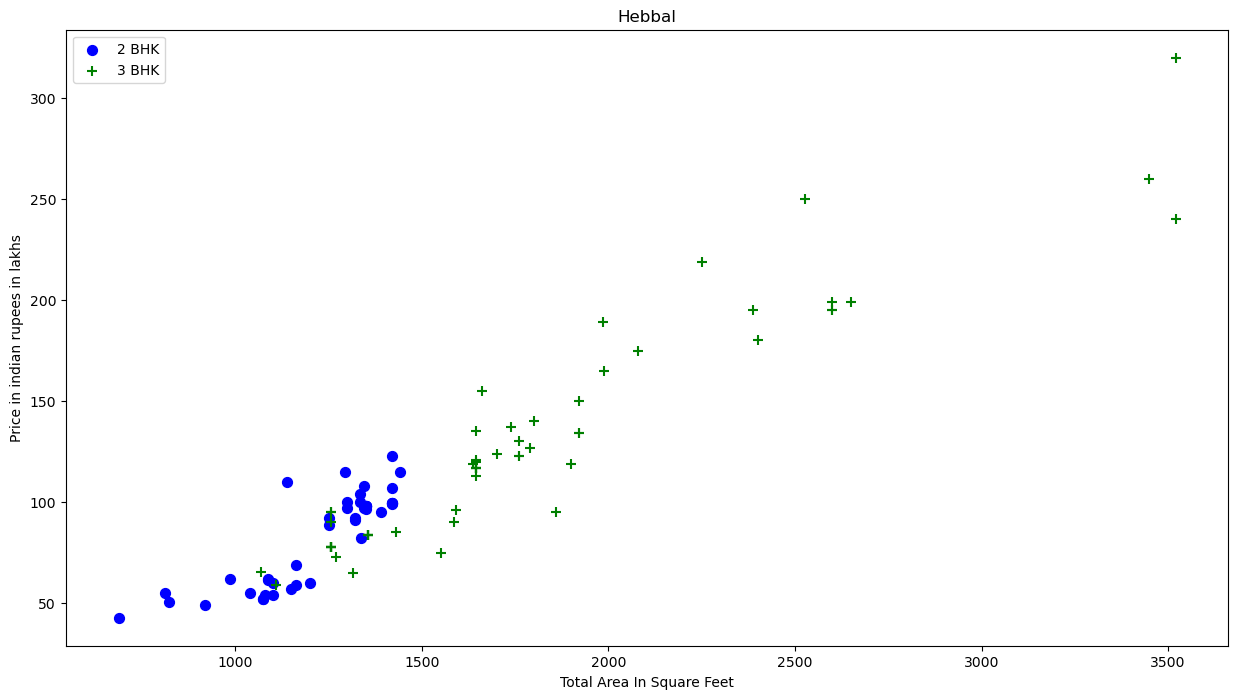

In [86]:
def scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,8)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Area In Square Feet")
    plt.ylabel("Price in indian rupees in lakhs")
    plt.title(location)
    plt.legend()
    
scatter_chart(hpd7,"Hebbal")
# same output for another location named 'Habbel'.....

In [87]:
# now we will try to remove these house units from our dataset :- 
def treat_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.per_sqft_price),
                'std': np.std(bhk_df.per_sqft_price),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.per_sqft_price<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
hpd8 = treat_bhk_outliers(hpd7)
hpd8.shape

(7329, 8)

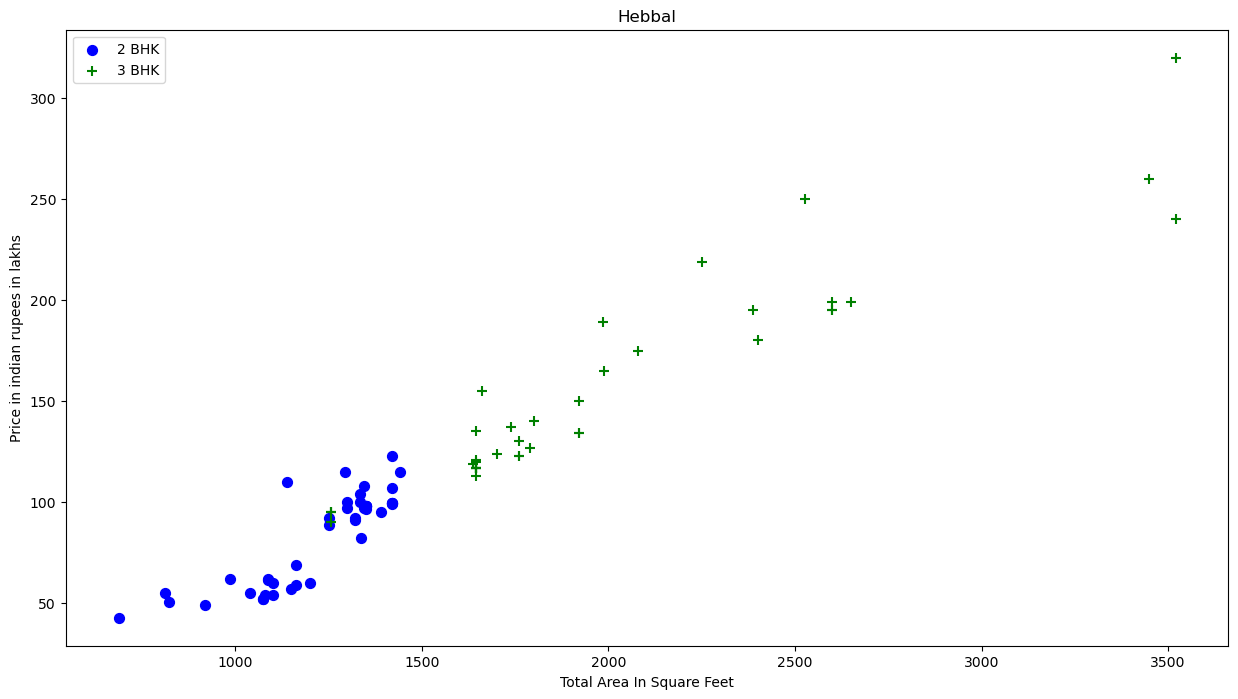

In [88]:
# now after treating an dremoving the outliers for price per sq.ft. with respect to the location we now check once again for respective location:- 
scatter_chart(hpd8,"Hebbal") # still after treating th outiers we have some bnormalities in the data but it is completely fine as it is way more difficult to remove those entries completely.

Text(0, 0.5, 'Count')

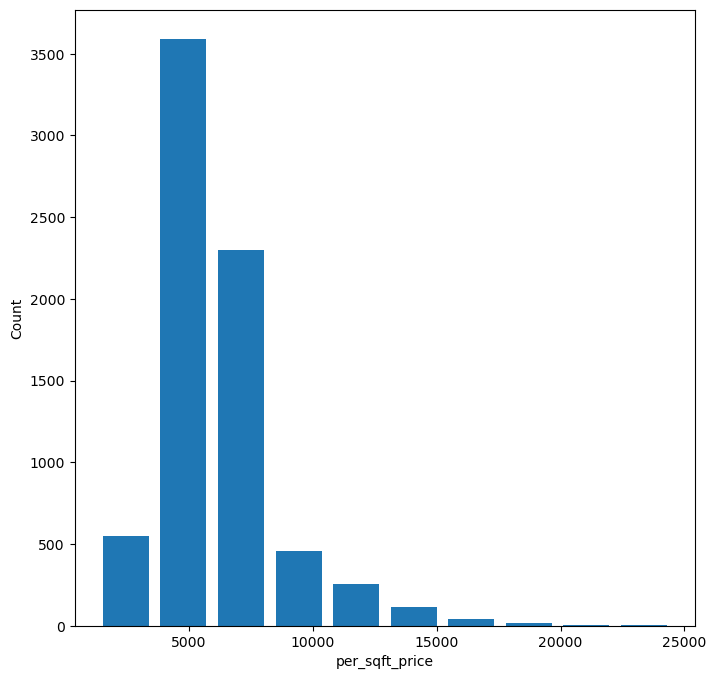

In [89]:
matplotlib.rcParams["figure.figsize"] = (8,8)
plt.hist(hpd8.per_sqft_price,rwidth=0.8)
plt.xlabel("per_sqft_price")
plt.ylabel("Count")
# with this we came to know that most of the houses have prices between 0 to 10,000 indian rupees :-

In [90]:
# now we will try to detect and treat the outliers present in the bathroom column or feature of our dataset:-
hpd8.bath.unique()
# we have values like 13 and 16 which are quite suspicious:-

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [91]:
hpd8[hpd8.bath>=10] # there are only 5 values as we look by using count()

,area_type,location,size,total_sqft,bath,price,bhk,per_sqft_price
5277,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,Super built-up Area,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,Super built-up Area,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,Super built-up Area,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,Super built-up Area,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

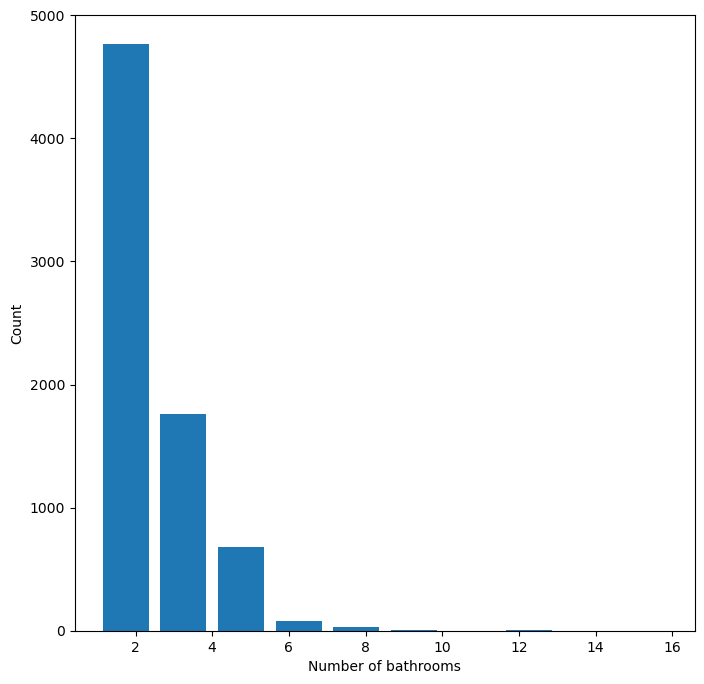

In [92]:
# with this histogram we get to know the distribution of number of bathrooms:-
plt.hist(hpd8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
# as we can see most of houses have not more than 8 but for more clearity we took a threshold of 10:-

In [94]:
# in order to treat the outliers in the batch feature we will remove the outliers by assuming the threshold that 'bhk+2' i.e:- if a house is 2bhk then on max. it should have 4 bathrooms and no more:-
hpd8[hpd8.bath>hpd8.bhk+2]

,area_type,location,size,total_sqft,bath,price,bhk,per_sqft_price
1626,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [95]:
# to remove these records of bathroom outliers we will simply assign it to new variable:-
hpd9=hpd8[hpd8.bath<hpd8.bhk+2]
hpd9.shape

(7251, 8)

In [96]:
#Now as our data is almost cleaned so now we need to drop some unnecessary features from our dataset in order to start building our model:- we will drop 'size' feature as we already have 'bhk' for that and we will remove 'per_sqft_price' as we created that calculated field for our outliers tretment which is now done. so,
hpd10 = hpd9.drop(['size','per_sqft_price'],axis='columns')

In [98]:
hpd10.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2


In [99]:
hpd11 = hpd10.drop(hpd10.columns[0],axis=1)

In [101]:
hpd11.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [102]:
# before start our model building we know that ML model cannot interpret text data and our 'location' is categorical data so to overcome from this we will use one hot encoding or pandas dummies.
dummy = pd.get_dummies(hpd11.location)
dummy.head()
#it created new column for each location with 'true' or '1' whereever that location occur

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [103]:
hpd12 = pd.concat([hpd11,dummy.drop('other',axis='columns')],axis='columns')
hpd12.head() 
#here we concat two dataset 'hpd11' and 'dummy' and while concating we drop a feature 'other' from the 'dummy' dataset in order to protect our data from dummy variable trap.

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
# now we can drop the column 'location' as for that we have created a numerical dummy columns:-
hpd13 = hpd12.drop('location',axis='columns')
hpd13.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [105]:
hpd13.shape

(7251, 245)

In [107]:
# NOW WE WILL BEGIN WITH THE MODEL BUILDING :- before that we need to separate independent and dependent variables so :-
x=hpd13.drop('price',axis='columns')
x.head() # these all are independent variables 

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [108]:
y = hpd13.price
y.head() # our dependent variable 

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [110]:
"""
for model building we alwys divide our dataset into training 
and test dataset then we use training dataset for model training
and to evaluate the model performanece we use the test dataset.
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [115]:
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8452277697874321

In [121]:
""" 
now we are going to use K-Fold cross validation for evaluating tye 
performance of the ML model more reliably and avoiding issues like 
overfitting and underfitting on a train test split.
"""
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cross_vali = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(),x,y,cv=cross_vali)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [128]:
# now we are going to use grid search using cross validation to find the best model or just to look whhich model works best on the useen data:- 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 

def finding_best_mlmodel_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cross_vali = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cross_vali, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

finding_best_mlmodel_using_gridsearchcv(x,y)

C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mohit\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,0.819001,{'fit_intercept': False}
1,lasso,0.687468,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.728827,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [131]:
# After looking at the above result we can say that Linear Regression gives the best score hence we are moving ahead with the linear regression model.

In [132]:
# we have already built a ML model above with a train score of 84% so we will use that to make property price prediction :-
# so we will write a function for price prediction :-
def price_prediction(location,sqft,bath,bhk):
    loc_index = np.where(x.columns == location)[0][0]
    
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index>=0:
        X[loc_index]=1
        
    return lr_clf.predict([X])[0]

In [142]:
price_prediction('1st Phase JP Nagar',1000,2,2)

C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677182066

In [134]:
price_prediction('1st Phase JP Nagar',1000,3,3)

C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395208691

In [137]:
price_prediction('Indira Nagar',1000,2,2) # prime location

C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006805

In [139]:
price_prediction('Indira Nagar',1000,3,3) # prime location

C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.5843020203343

In [141]:
# if we look for some locations then we see for higher number of bhk or bathroom price is lower but for lower number price is higher , this is because 
# in our data we have samples in which for given locations 3 bedroom apartment for same sqfeet area cost less as compare to 2 bedroom . This could be the case 
# case in our sample because practically it is possible that for 3 bedroom house bedrooms are smaller in size as compare to house with 2 bedrooms whose size
# would be bigger as compare to those of 3 bedroom house.
# this is the reason why model is giving lower price result for higher number of bedrooms and higher price for lower number of bedrooms for some locations. 